Cuenta de Control

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [10]:
cnn = sqlite3.connect('ctacontrol.db')

In [14]:
df = pd.read_sql("select * from cuenta",cnn)

In [15]:
df

,num_ruc,cnt_comprobantes_x,mto_base_x,mto_imp_x,cnt_comprobantes_y,mto_base_y,mto_imp_y,merge,mes,dia,foto,periodo,num_form,range,NaN
0,10035793521,28,218943.17,6568.34,6.0,36911.29,1107.34,0,11,5,dia,201910,626,range1,None
1,10062257151,70,282336.00,8470.08,15.0,42411.00,1272.33,0,11,5,dia,201910,626,range1,None
2,10076683722,1,10026.00,300.78,1.0,10026.00,300.78,1,11,5,dia,201910,626,range1,None
3,10153535057,39,266075.18,7982.24,25.0,204320.67,6129.61,0,11,5,dia,201910,626,range1,None
4,10166475762,27,215926.34,6477.79,12.0,99299.30,2978.98,0,11,5,dia,201910,626,range1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230214,20600657888,185,13507.66,264.98,185.0,13507.66,264.98,1,1,23,dia,201912,697,range1,None
230215,20600869940,11125,1897721.20,36997.46,11125.0,1897721.20,36997.46,1,1,23,dia,201912,697,range3,None
230216,20601083516,1,40.07,0.79,1.0,40.07,0.79,1,1,23,dia,201912,697,range1,None
230217,20601274699,2443,1815336.01,35595.16,2443.0,1815336.01,35595.16,1,1,23,dia,201912,697,range2,None


In [44]:
columns = ["num_ruc","cnt_comprobantes_x","cnt_comprobantes_y","merge","mes","dia","periodo","num_form","foto"]
dt = df[columns]
dt

,num_ruc,cnt_comprobantes_x,cnt_comprobantes_y,merge,mes,dia,periodo,num_form,foto
0,10035793521,28,6.0,0,11,5,201910,626,dia
1,10062257151,70,15.0,0,11,5,201910,626,dia
2,10076683722,1,1.0,1,11,5,201910,626,dia
3,10153535057,39,25.0,0,11,5,201910,626,dia
4,10166475762,27,12.0,0,11,5,201910,626,dia
...,...,...,...,...,...,...,...,...,...
230214,20600657888,185,185.0,1,1,23,201912,697,dia
230215,20600869940,11125,11125.0,1,1,23,201912,697,dia
230216,20601083516,1,1.0,1,1,23,201912,697,dia
230217,20601274699,2443,2443.0,1,1,23,201912,697,dia


In [47]:
d1 = dt.groupby(["mes","dia","num_form","foto"])["num_ruc"].count().to_frame()
d1.head(100)

num_ruc
mes dia num_form foto          
1   1   626      dia       3022
                 tarde     3124
        633      dia         13
                 tarde       13
        697      dia        385
...                         ...
12  30  626      tarde     3116
        633      dia         13
                 tarde       13
        697      dia        410
                 tarde      410

[192 rows x 1 columns]

In [51]:
d2 = d1.groupby("num_form").mean()

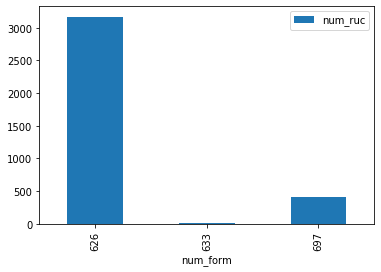

In [52]:
d2.plot(kind="bar")

In [53]:
d2

,num_ruc
num_form,
626,3167.687500
633,13.187500
697,416.296875


In [55]:
d3 = dt.groupby(["mes","dia"])["num_ruc"].count().to_frame()
d3

num_ruc
mes dia         
1   1       6957
    3       7183
    6       7236
    8       7248
    15      7248
    16      7251
    21      7253
    23      3627
2   1       3301
11  5       7053
    6       7077
    7       7092
    12      7098
    15      7098
    18     10646
    19      7094
    20      7096
    21      7096
    22      3548
    26      7094
    27      7094
    28      3547
12  1       6760
    2       6943
    3       6974
    4       7005
    5       3518
    9       3538
    10      7076
    12      7078
    13      7078
    17      7078
    20      3539
    24      3539
    27      7078
    30      7078

In [ ]:
d4 = dt.groupby(["mes","dia","num_form","foto"])["num_ruc"].count().to_frame()

In [94]:
d4 = dt.loc[dt["num_form"]==626,["num_ruc","cnt_comprobantes_x"]].groupby("num_ruc").mean()
d4 = d4.round(0)

In [125]:
count, bin_edges = np.histogram(d4)
bin_edges

array([1.0000e+00, 2.5110e+02, 5.0120e+02, 7.5130e+02, 1.0014e+03,
       1.2515e+03, 1.5016e+03, 1.7517e+03, 2.0018e+03, 2.2519e+03,
       2.5020e+03])

In [ ]:
d4.reset_index(level=0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1EC1CAF0>]],
      dtype=object)

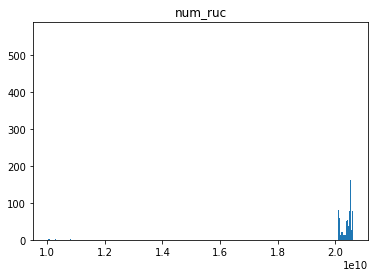

In [93]:
d4.hist(column = "num_ruc", bins=1000, grid=False)

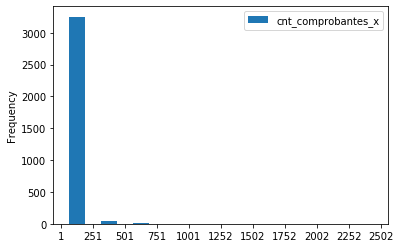

In [137]:
d4.plot(kind="hist",rwidth=0.5, xticks = bin_edges)
plt.legend()


In [98]:
d4.plot.hist

<bound method PlotAccessor.hist of <pandas.plotting._core.PlotAccessor object at 0x1EBC66F0>>

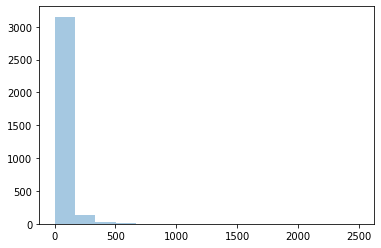

In [171]:
seaborn.distplot(d4,kde=False,bins=15)

In [176]:
d5 = dt.loc[dt["num_form"]==697,["num_ruc","cnt_comprobantes_x"]].groupby("num_ruc").mean()
d5 = d5.round(0)
d6 = dt.loc[dt["num_form"]==633,["num_ruc","cnt_comprobantes_x"]].groupby("num_ruc").mean()
d6 = d6.round(0)

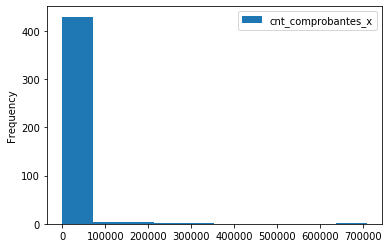

In [115]:
d5.plot(kind="hist")

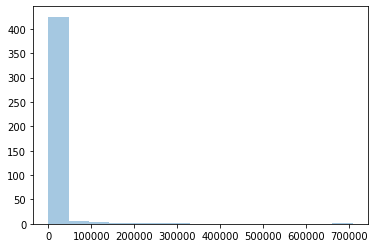

In [169]:
seaborn.distplot(d5,kde=False,bins=15)

In [133]:
d4 = d4.sort_values(by=["cnt_comprobantes_x"])

In [135]:
d4

,cnt_comprobantes_x
num_ruc,
20537757214,1.0
20504608191,1.0
20503889561,1.0
20134120909,1.0
20100562848,1.0
...,...
20332970411,818.0
20508565934,827.0
20109072177,1207.0


In [139]:
from matplotlib.ticker import StrMethodFormatter


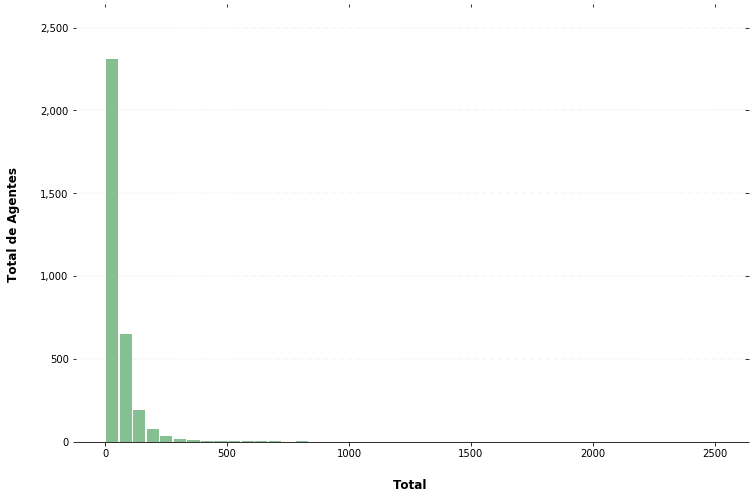

In [147]:
ax = d4.hist(column='cnt_comprobantes_x', bins=45, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Total", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Total de Agentes", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

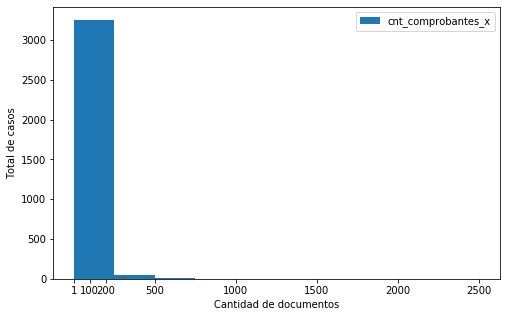

In [167]:
#count, bin_edges = np.histogram(d4)
 
d4.plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
 
plt.xlabel('Cantidad de documentos') # add y-label
plt.ylabel('Total de casos') # add x-label
 
plt.show()

In [178]:
d5 = d5.sort_values(by=["cnt_comprobantes_x"])
d6 = d6.sort_values(by=["cnt_comprobantes_x"])

In [179]:
d6

,cnt_comprobantes_x
num_ruc,
20298058490,1.0
20603309368,2.0
20552657803,5.0
20259829594,6.0
20506151547,308.0
20513251506,708.0
20601147450,844.0
20501458164,1252.0
20600427734,2244.0


In [180]:
d5

,cnt_comprobantes_x
num_ruc,
20604539812,1.0
10104655535,1.0
20108983583,1.0
20105043091,1.0
10238835963,1.0
...,...
20373209601,182914.0
20100102413,210170.0
20100078792,264099.0


In [190]:
d5[(d5["cnt_comprobantes_x"]>=100000)&(d5["cnt_comprobantes_x"]<1000000000)].count()

cnt_comprobantes_x    8
dtype: int64

In [195]:
d6[(d6["cnt_comprobantes_x"]>=1000)&(d6["cnt_comprobantes_x"]<10000)].count()

cnt_comprobantes_x    5
dtype: int64

In [166]:
bin_edges = np.array([1,100,200,500,1000,1500,2000,2500])

In [9]:
cnn.close()